In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
pd.options.display.max_columns = 999

In [2]:
# load cluster 1 file
df1 = pd.read_csv('../files/df_cluster_1.csv')

In [3]:
df1.head()

,ln_Number of Subscribers,ln_Average DL Throughput (kbit/s),Average UL Throughput (kbit/s),ln_DL IBLER (%),ln_UL IBLER (%),DL MCS (only for Initial Transmission),UL MCS (only for Initial Transmission),ln_UL Spectrum Efficiency (bps/HZ),RSRP(All MRs) (dBm),ln_MR Count,Total Traffic Volume (MB)
0,3.713572,9.101216,4872.108,2.478218,1.957274,12.0,26.0,-0.301105,-101.85,6.317165,437.700
1,3.465736,8.826138,4137.366,2.579459,1.965713,10.0,23.0,-0.527633,-101.01,7.436617,991.915
2,5.049856,8.861564,4046.861,2.629728,1.865629,10.0,23.0,-0.776529,-100.59,6.641182,476.937
3,6.272877,8.889869,4151.480,2.655352,2.038620,9.0,20.0,-0.634878,-100.55,7.813592,1131.058
4,1.098612,8.379551,9530.163,2.436241,2.303585,7.0,25.0,0.641854,-100.13,4.624973,287.036


In [4]:
cols = ['ln_Average DL Throughput (kbit/s)','Average UL Throughput (kbit/s)',
        'ln_DL IBLER (%)', 'ln_UL IBLER (%)','DL MCS (only for Initial Transmission)',
        'UL MCS (only for Initial Transmission)','ln_UL Spectrum Efficiency (bps/HZ)','ln_MR Count']

corr = []
for col in cols:
    corr.append(np.corrcoef(df1['RSRP(All MRs) (dBm)'],df1[col])[0,1])
    
corr_df = pd.DataFrame({'feat':cols,'correlation':corr})
corr_df

,feat,correlation
0,ln_Average DL Throughput (kbit/s),0.186402
1,Average UL Throughput (kbit/s),0.083567
2,ln_DL IBLER (%),-0.025391
3,ln_UL IBLER (%),-0.117576
4,DL MCS (only for Initial Transmission),0.186066
5,UL MCS (only for Initial Transmission),0.198568
6,ln_UL Spectrum Efficiency (bps/HZ),0.033123
7,ln_MR Count,0.347495


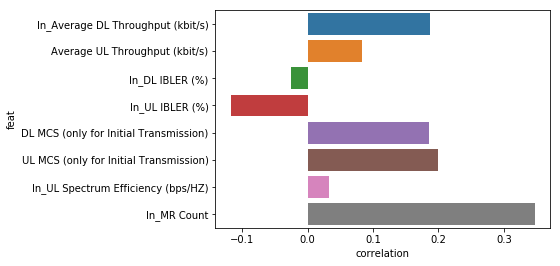

In [6]:
_ = sns.barplot(x='correlation',y='feat',data=corr_df)

In [22]:
# transform any feature with skewness greater than 1 except the latitude and longitude
def log_tran(df,except_col=[]):
    transformed_col=[]
    for col in df.columns:
        if (df[col].skew() > 1) and (col not in except_col):
            df[col] = np.log(df[col])
            df.rename({col:'ln_{}'.format(col)},axis=1,inplace=True)
            transformed_col.append(col)
    return df,transformed_col

def inv_log_tran(df):
    for col in df.columns:
        if col[:2] == 'ln':
            df[col] = np.e**(df[col])
            df.rename({col:col[3:]},axis=1,inplace=True)
    return df

def cor_col(df):
    
    threshold = 0.8
    
    # Absolute value correlation matrix
    corr_matrix = df.corr().abs()
    
    # Upper triangle of correlations
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Select columns with correlations above threshold
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    
    return to_drop

In [23]:
df1_inv = inv_log_tran(df1.copy())

In [24]:
df1_inv.head()

,Number of Subscribers,Average DL Throughput (kbit/s),Average UL Throughput (kbit/s),DL IBLER (%),UL IBLER (%),DL MCS (only for Initial Transmission),UL MCS (only for Initial Transmission),UL Spectrum Efficiency (bps/HZ),RSRP(All MRs) (dBm),MR Count,Total Traffic Volume (MB)
0,41.0,8966.193,4872.108,11.92,7.08,12.0,26.0,0.74,-101.85,554.0,437.700
1,32.0,6809.937,4137.366,13.19,7.14,10.0,23.0,0.59,-101.01,1697.0,991.915
2,156.0,7055.510,4046.861,13.87,6.46,10.0,23.0,0.46,-100.59,766.0,476.937
3,530.0,7258.069,4151.480,14.23,7.68,9.0,20.0,0.53,-100.55,2474.0,1131.058
4,3.0,4357.052,9530.163,11.43,10.01,7.0,25.0,1.90,-100.13,102.0,287.036


In [27]:
cols = ['Average DL Throughput (kbit/s)','Average UL Throughput (kbit/s)',
        'DL IBLER (%)', 'UL IBLER (%)','DL MCS (only for Initial Transmission)',
        'UL MCS (only for Initial Transmission)','UL Spectrum Efficiency (bps/HZ)','MR Count']

corr = []
for col in cols:
    corr.append(np.corrcoef(df1_inv['RSRP(All MRs) (dBm)'],df1_inv[col])[0,1])
    
corr_df_2 = pd.DataFrame({'feat':cols,'correlation':corr})
corr_df_2

,feat,correlation
0,Average DL Throughput (kbit/s),0.177347
1,Average UL Throughput (kbit/s),0.083567
2,DL IBLER (%),-0.023129
3,UL IBLER (%),-0.110345
4,DL MCS (only for Initial Transmission),0.186066
5,UL MCS (only for Initial Transmission),0.198568
6,UL Spectrum Efficiency (bps/HZ),0.026634
7,MR Count,0.293823


In [16]:
import lightgbm as lgb
# load the model
model_lgv_gcv = lgb.Booster(model_file='../model/lgb_c1_4.txt')